
# Smart Camera 5000
#### Hellen Lima e Victor Barros

<a id="topo"></a>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 4><strong>Projeto Integrado 2016/2 - Apresentação Parcial: </strong></font>
<p><a href="#1">1. Rede neural para os operandos: </a></p>
 .
<p><a href="#1a"> 1a. Importando Dados de Treinamento e Criando o Modelo</a></p>
<p><a href="#1b"> 1b. Cálculo de Acurácia</a></p>
<p><a href="#1c"> 1c. Classificando um Novo Dígito</a></p>
<p><a href="#1d"> 1d. Resposta do Modelo</a></p>
.
.
<p><a href="#1">2. Rede neural para os operadores (+,-,x): </a></p>
 .
<p><a href="#2a"> 2a. Importando Dados de Treinamento e Criando o Modelo</a></p>
<p><a href="#2b"> 2b. Treinando a rede para operadores</a></p>
<p><a href="#2c"> 2c. Cálculo de Acurácia</a></p>
<p><a href="#2d"> 2d. Classificando um Novo Dígito</a></p>
<p><a href="#2e"> 2e. Resposta do Modelo</a></p>
<p></p>
</div>

<hr>

<a id="1a"></a>
# Importando Dados de Treinamento e Criando o Modelo para Operandos

In [30]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
#training using 11 classes, the last one is random

mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

  # Create the model
x = tf.placeholder(tf.float32, [None, 784])
#W = tf.Variable(tf.random_normal([784, 10], stddev=0.2))
W = tf.Variable(tf.zeros([784, 11]))
b = tf.Variable(tf.zeros([11]))
y = tf.matmul(x, W) + b
#y = tf.nn.softmax(y) no activation function

rand = abs(np.random.normal(0,0.5,(2000,784)))
#mnist_train = np.array(mnist.train.images[0:20000])
mnist_train = np.array(mnist.train.images) #55000 entries
input_x = np.concatenate((mnist_train, rand), axis=0) #57000 entries

  # Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 11])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

label_mnist_last = np.zeros([55000,1])
labels_mnist = np.concatenate((mnist.train.labels, label_mnist_last), axis=1)
labels_rnd = np.concatenate((np.zeros([2000,10]), np.ones([2000,1])), axis=1)
labels = np.concatenate((labels_mnist, labels_rnd), axis=0)

sess = tf.InteractiveSession()

tf.initialize_all_variables().run()
for _ in range(1000):
    batch_xs = input_x
    batch_ys = labels
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="1b"></a>
# Cálculo de Acurácia

In [31]:
#calculating accuracy for test
rand_in_tst = abs(np.random.normal(0,0.5,(1000,784)))
mnist_test = np.array(mnist.test.images)
input_tst = np.concatenate((mnist_test, rand_in_tst), axis=0)

label_mnist_last_tst = np.zeros([10000,1])
labels_mnist_tst = np.concatenate((mnist.test.labels, label_mnist_last_tst), axis=1)
labels_rnd_tst = np.concatenate((np.zeros([1000,10]), np.ones([1000,1])), axis=1)
labels_tst = np.concatenate((labels_mnist_tst, labels_rnd_tst), axis=0)

weights = np.array(sess.run(W))
biases = np.array(sess.run(b))

outputs_test = np.dot(input_tst,weights)+biases

correct_prediction = tf.equal(tf.argmax(outputs_test, 1), tf.argmax(labels_tst, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: %f" % sess.run(accuracy, feed_dict={x:input_tst,
                                      y_: labels_tst}))

Test accuracy: 0.928545


<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="1c"></a>

# Classificando um Novo Dígito

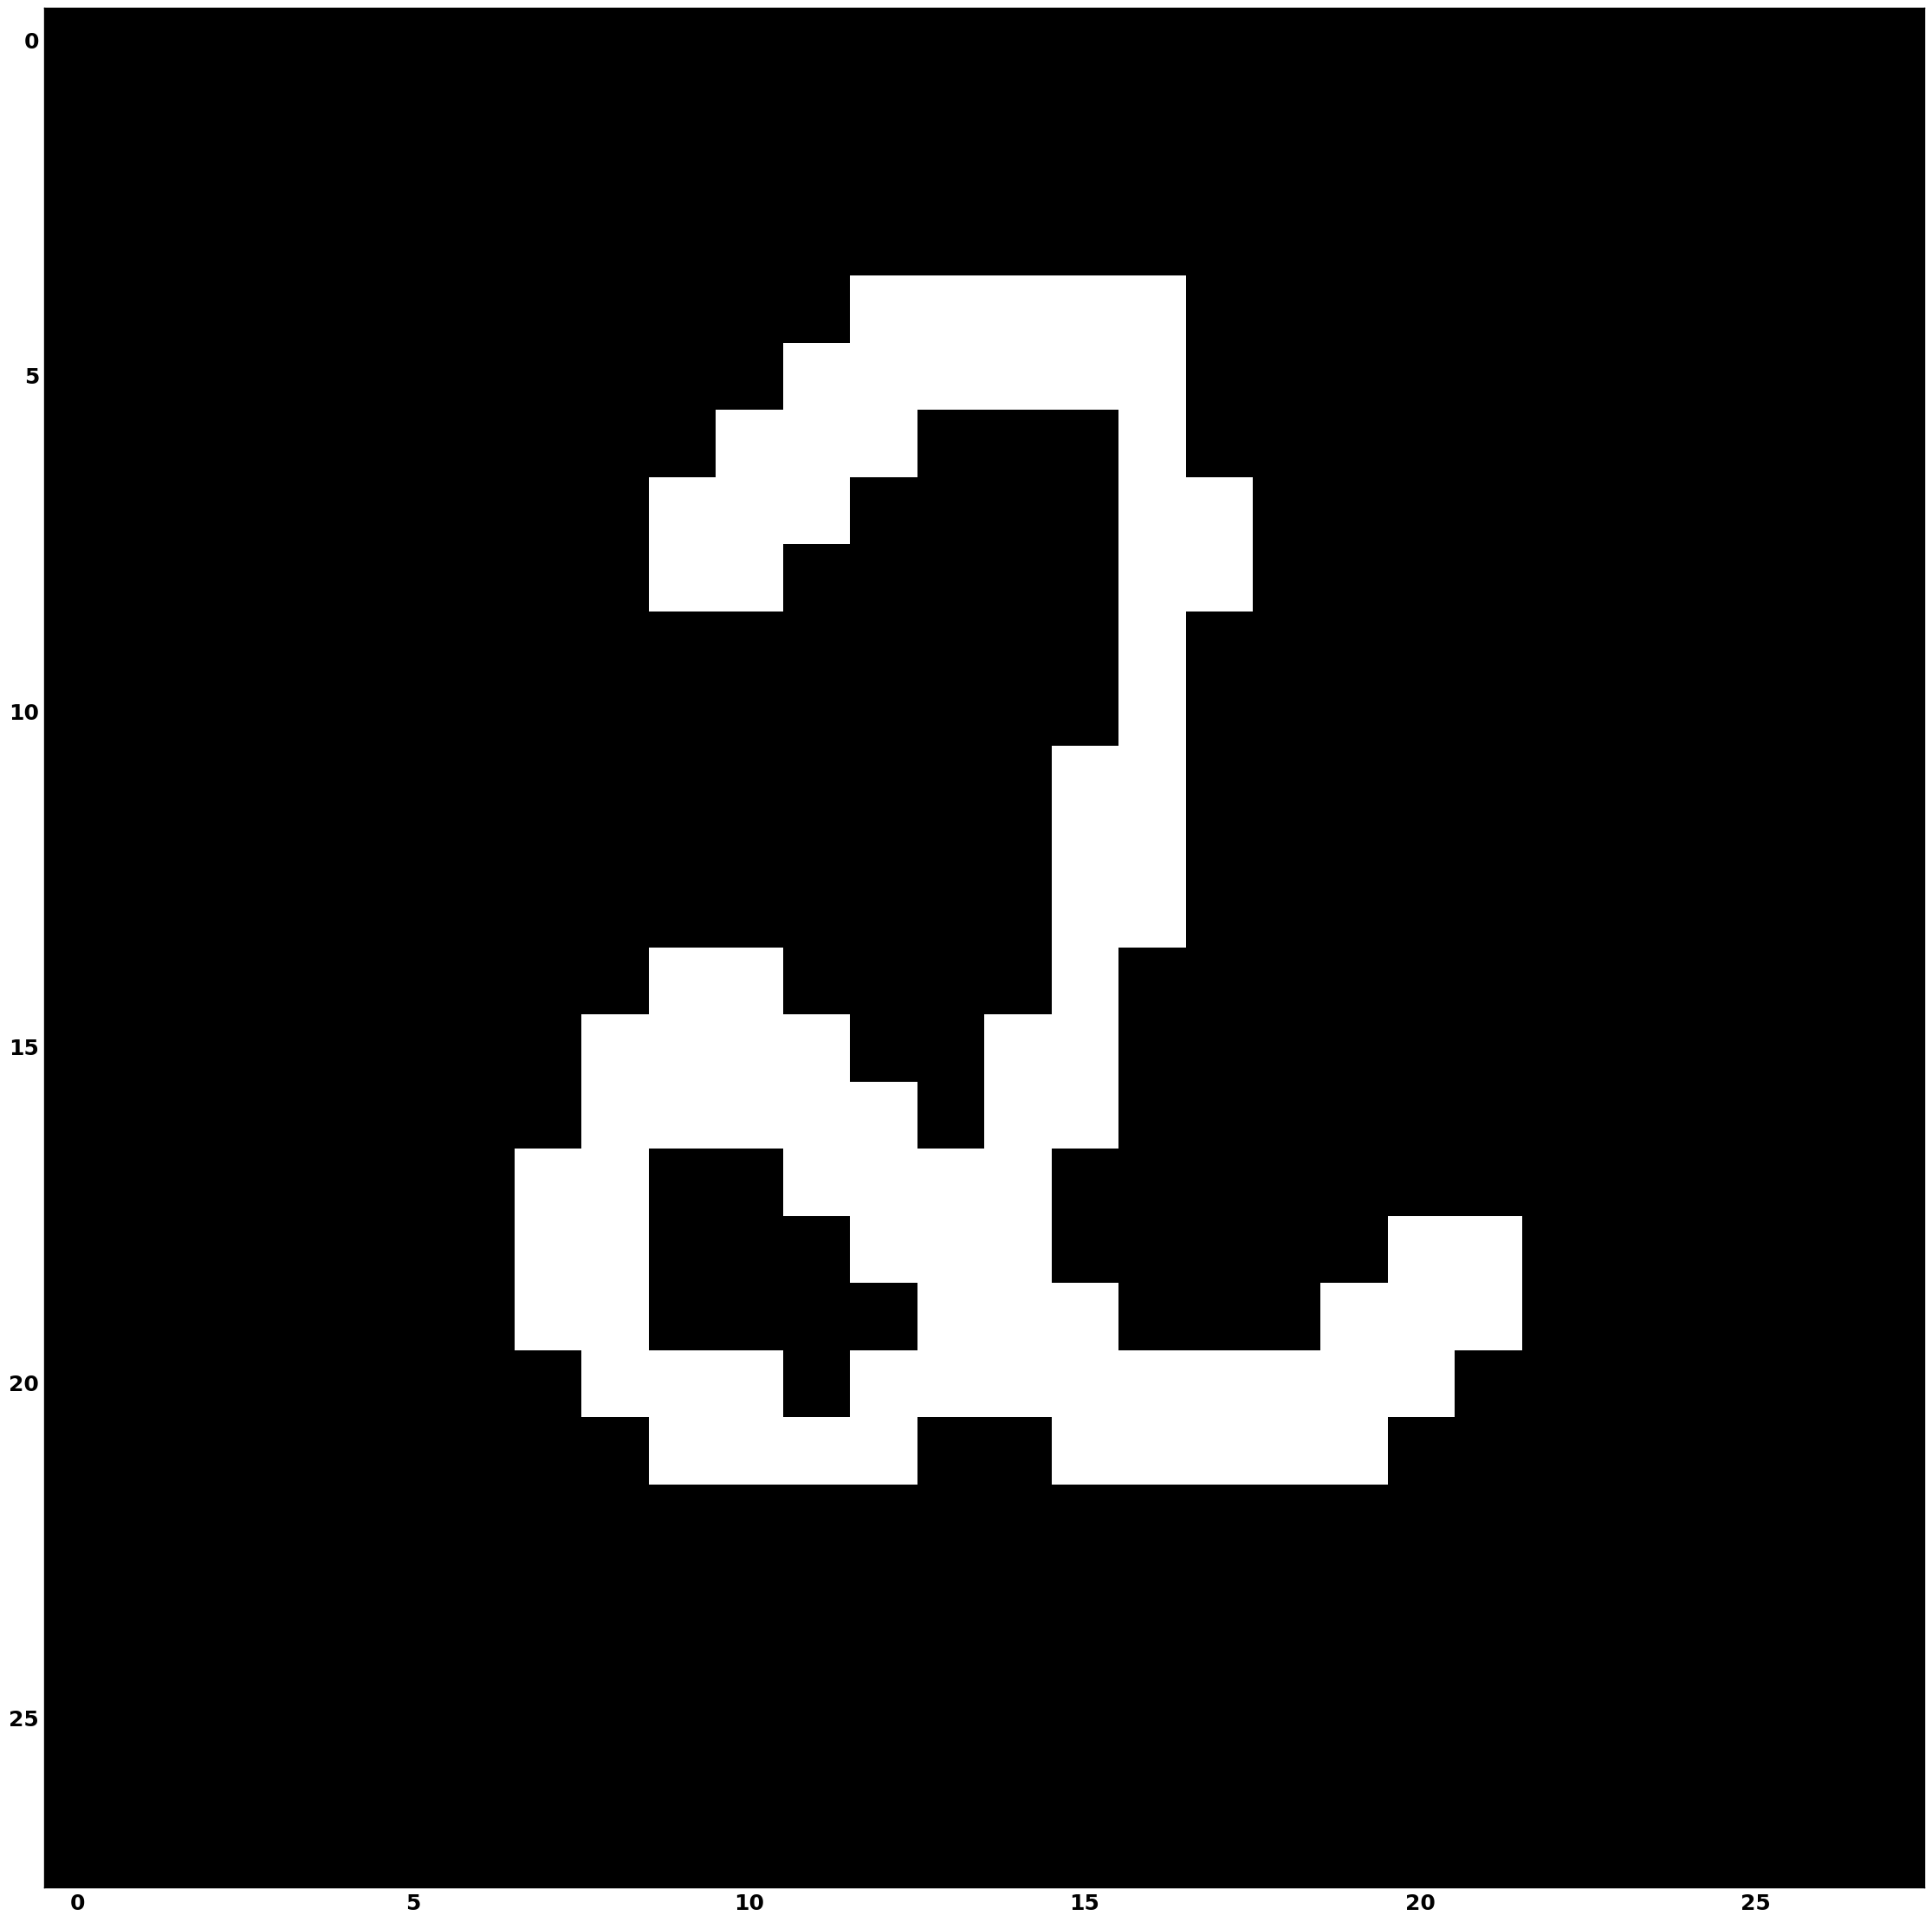

In [3]:
#showing character
import cv2
import numpy as np
img_raw = cv2.imread('mini_test_sample/doisdahellen.jpg',cv2.IMREAD_GRAYSCALE)
img_raw = cv2.resize(img_raw, (28, 28)) 

inv_mat = np.ones([28,28])*255
img_inv = abs(np.subtract(img_raw, inv_mat))
img_inv[img_inv>20] = 255
img_inv[img_inv<20] = 0
img_norm = img_inv/255

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline
fig, ax = plt.subplots(figsize=(28,28),nrows=1, ncols=1)
mnist_test = np.reshape(mnist.test.images[10,:],[28,28])
ax.imshow(img_norm,cmap='gray',interpolation="nearest")

<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="1d"></a>
# Resposta do Modelo

In [4]:
test_in = np.reshape(img_norm,[784,])
out_teste = np.dot(test_in,weights)+biases

rand_inp = np.random.random([1,784])
out_rand = np.dot(rand_inp,weights)+biases

print(out_teste)
print ("Resposta: %d" % out_teste.argmax())

[-2.85538339  1.72316162  8.34449958  1.55166445 -1.95248973 -0.22206835
  5.65113374 -6.52956801  1.68407921 -4.5543917  -2.84060666]
Resposta: 2


In [47]:
#salvando a rede neural
np.savetxt('weights.txt', weights, fmt='%7.2f')
#print(np.shape(weights))

np.savetxt('biases.txt', biases, fmt='%7.2f')
#print(np.shape(biases))


(784, 11)
(11,)


<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="2a"></a>
# Importando o banco de dados de treinamento

In [33]:
import os
import numpy as np
import cv2
import glob
# this first cell is to import the database from my computer

#label: [mult add sub]
fnames_mult=[]
fnames_mult = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/multiplicacao/train/*.jpg')]
train_mult = [];
labels_mult = [];
for i in range(len(fnames_mult)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/multiplicacao/train/' + fnames_mult[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    train_mult.append(image);
    labels_mult.append([1,0,0]);

fnames_add = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/adicao/train/*.jpg')]
train_add = [];
labels_add = [];
for i in range(len(fnames_add)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/adicao/train/' + fnames_add[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    train_add.append(image);
    labels_add.append([0,1,0]);

fnames_sub = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/subtracao/train/*.jpg')]
train_sub = [];
labels_sub = [];
for i in range(len(fnames_sub)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/subtracao/train/' + fnames_sub[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,]);
    train_sub.append(image);
    labels_sub.append([0,0,1]);

input_x_op = np.concatenate((train_mult, train_add, train_sub), axis=0)
labels_op = np.concatenate((labels_mult, labels_add, labels_sub), axis=0)

<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="2b"></a>
# Treinando a rede para operadores

In [49]:
import tensorflow as tf
import numpy as np

#training process using mult, add and sub
#label: [mult add sub]

  # Create the model
x = tf.placeholder(tf.float32, [None, 784])
#W = tf.Variable(tf.random_normal([784, 10], stddev=0.2))
W = tf.Variable(tf.zeros([784, 3]))
b = tf.Variable(tf.zeros([3]))
y = tf.matmul(x, W) + b
#y = tf.nn.softmax(y) no activation function

# some train samples, 3 classes

  # Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 3])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# labels: [mult add sub]

sess = tf.InteractiveSession()

tf.initialize_all_variables().run()
for _ in range(1000):
    batch_xs = input_x_op
    batch_ys = labels_op
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="2c"></a>
# Importando dados de Teste e Cálculo de Acurácia

In [52]:
#calculating accuracy for test sample
fnames_mult = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/multiplicacao/test/*.jpg')]
test_mult = [];
labels_mult_tst = [];
for i in range(len(fnames_mult)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/multiplicacao/test/' + fnames_mult[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    test_mult.append(image);
    labels_mult_tst.append([1,0,0]);

fnames_add = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/adicao/test/*.jpg')]
test_add = [];
labels_add_tst = [];
for i in range(len(fnames_add)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/adicao/test/' + fnames_add[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    test_add.append(image);
    labels_add_tst.append([0,1,0]);

fnames_sub = [os.path.basename(x) for x in glob.glob('/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/subtracao/test/*.jpg')]
test_sub = [];
labels_sub_tst = [];
for i in range(len(fnames_sub)):
    filepath = '/Users/hellen/workspace/supercamera/data_acquisition/pdf2jpg-melhor resolucao/subtracao/test/' + fnames_sub[i];
    image = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE);
    image = np.reshape(image,[784,])
    test_sub.append(image);
    labels_sub_tst.append([0,0,1]);
    
input_tst_op = np.concatenate((test_mult, test_add, test_sub), axis=0)
labels_tst_op = np.concatenate((labels_mult_tst, labels_add_tst, labels_sub_tst), axis=0)

weights_op = np.array(sess.run(W))
biases_op = np.array(sess.run(b))

outputs_test_op = np.dot(input_tst_op,weights_op) + biases_op
n_tst_samples = len(outputs_test_op);
correct_prediction = 0;
for i in range(n_tst_samples):
    if (outputs_test_op[i].argmax() == labels_tst_op[i].argmax()):
        correct_prediction = correct_prediction + 1;
        #print(correct_prediction)

accuracy = float(correct_prediction)/float(n_tst_samples);
print("Test accuracy: %f" % accuracy);

Test accuracy: 0.967659


<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="2d"></a>
# Classificando um Novo Dígito

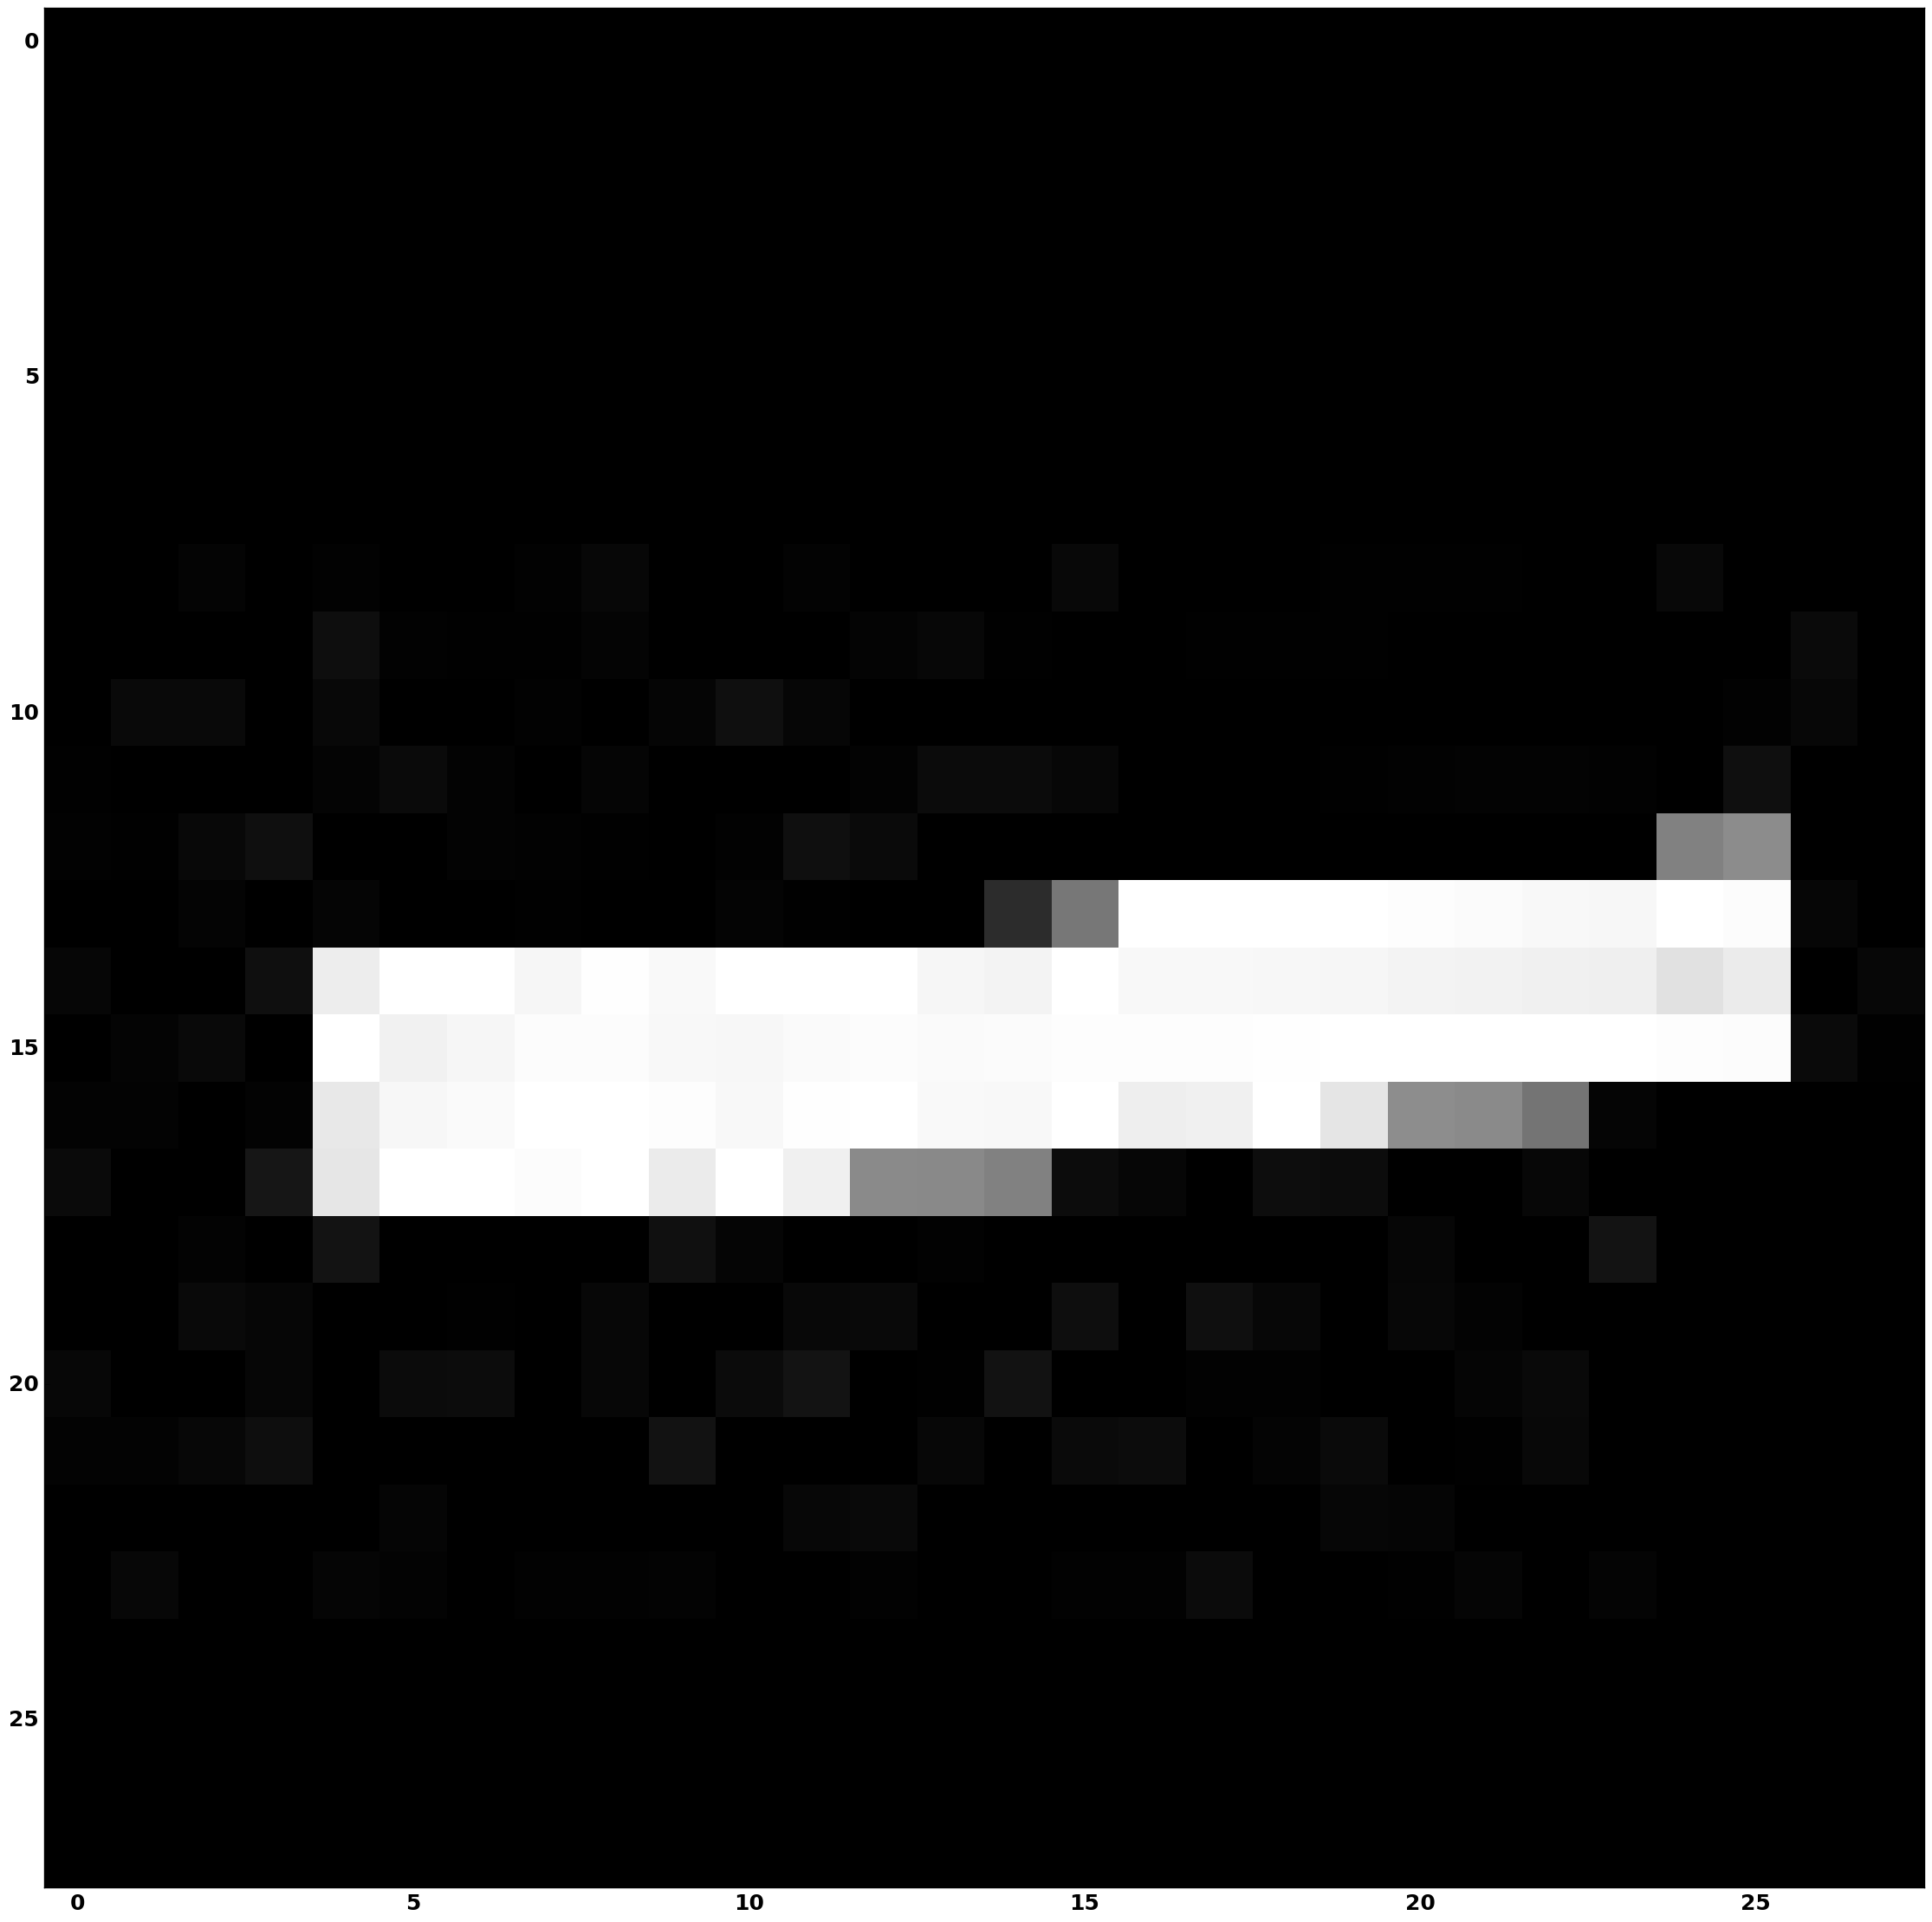

In [59]:
import cv2
import numpy as np

#img_raw = cv2.imread('mini_test_sample/mais.jpg',cv2.IMREAD_GRAYSCALE)
img_raw = cv2.imread('menus.jpg',cv2.IMREAD_GRAYSCALE)
img_raw = cv2.resize(img_raw, (28, 28)) 

inv_mat = np.ones([28,28])*255
img_inv = abs(np.subtract(img_raw, inv_mat))
img_inv[img_inv>20] = 255
img_inv[img_inv<20] = 0
img_norm = img_inv/255

image_norm = input_tst_op[6]
image_norm = np.reshape(image_norm,[28,28])

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline
fig, ax = plt.subplots(figsize=(28,28),nrows=1, ncols=1)

ax.imshow(img_raw,cmap='gray',interpolation="nearest")

<p><a href="#topo">[retornar ao topo]</a></p>
<hr>
<a id="2e"></a>
# Resposta do Modelo

In [54]:
test_in = np.reshape(img_raw,[1,784])
out_teste = np.dot(test_in,weights_op)+biases_op
#label: [mult add sub]

print(out_teste)
#print ("Resposta: %d" % out_teste.argmax())
if out_teste.argmax() == 0:
    print ("Resposta: multiplicar")
if out_teste.argmax() == 1:
    print ("Resposta: somar")
if out_teste.argmax() == 2:
    print ("Resposta: subtrair")

[[-45911.421875     2989.20849609  42922.11328125]]
Resposta: subtrair


In [ ]:
np.savetxt('weights_op.txt', weights_op, fmt='%7.2f')
print(np.shape(weights))

np.savetxt('biases)op.txt', biases_op, fmt='%7.2f')
print(np.shape(biases))